In [84]:
#--IMPORT BASIC LIBRARIES
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [85]:
# For timeseries RNN LSTM neural network
from tensorflow. keras.models import Sequential
from tensorflow. keras. layers import LSTM
from tensorflow. keras. layers import Dropout
from tensorflow. keras. layers import Dense

In [86]:
#-------- IMPORT KERAS: TimeseriesGenerator
# This class produces time series batches used on training/testing the model
from tensorflow.keras.preprocessing. sequence import TimeseriesGenerator
#---- IMPORT KERAS: MinMaxscaler
# This class is used to preprocess (scale) the data
from sklearn.preprocessing import MinMaxScaler

Data set

In [87]:
# Load the data
df_All = pd.read_csv('/content/energydata_complete.csv')

In [88]:
df_All.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Breif Expploratory Data Analysis

#(EDA)

In [89]:
df_All.shape

(19735, 29)

In [90]:
df_All.dtypes

,0
date,object
Appliances,int64
lights,int64
T1,float64
RH_1,float64
T2,float64
RH_2,float64
T3,float64
RH_3,float64
T4,float64


In [91]:
df_All.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [92]:
df = df_All.iloc[:, 4:5]

In [93]:
df.head()

,RH_1
0,47.596667
1,46.693333
2,46.300000
3,46.066667
4,46.333333


<Axes: >

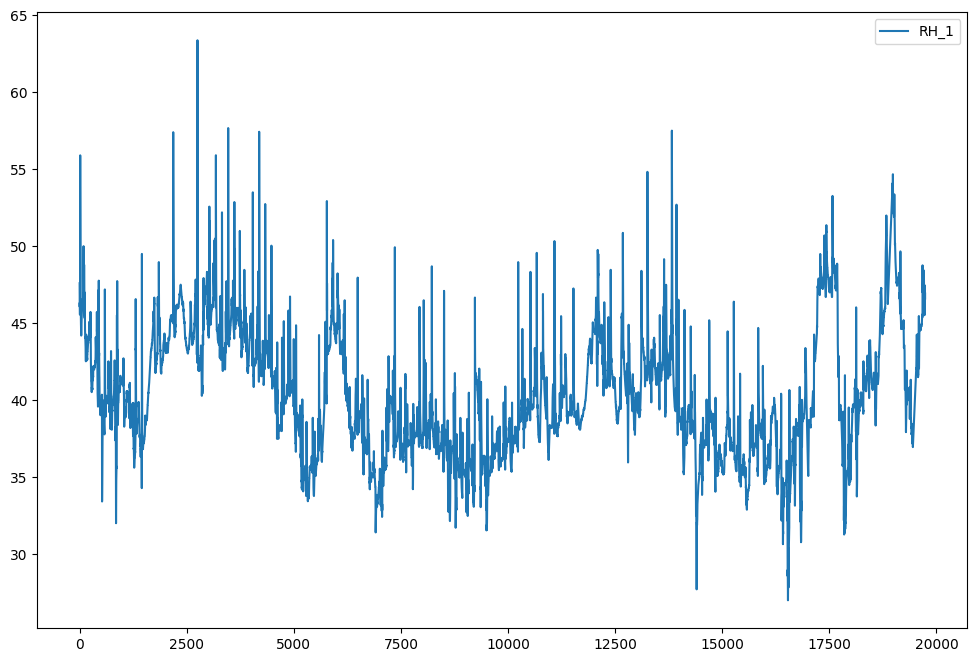

In [94]:
df.plot(figsize=(12,8))

#Length of Input Time Series - Number of Input Time Steps


In [149]:
length50 = 50

In [150]:
length50

50

#Time Series Dataset: Train / test Split

In [97]:
len(df)


19735

In [98]:
# Set percentage of data used for testing
test_percent = 0.1

#Split Data -> Train / Test


In [99]:
# Need to find the Length (number of data points) of the testing dataset
# It has been found (ahove) that around 205 data points are used for testing
test_length = np.round(len(df)*test_percent)

test_length

1974.0

In [100]:
# The testing data set starts at this index
# test start_ index = int(len(df) - test_Length)
split_index = int(len(df) - test_length)
split_index

17761

In [101]:
# Create separate trainging / testing datasets
# Training dataset: All the indices from start to split index
# (excluding split_index)
data_train = df.iloc[: split_index]
# Testing dataset:
# --) All the indices from (split_index - Length50) to the end of the dataframe
# --) split index - Length60: Need the Last 60 historical data points (belong to data_train) to predict the first data point of the data_test
data_test = df.iloc[split_index - length50 :]

In [102]:
data_train.head()

,RH_1
0,47.596667
1,46.693333
2,46.300000
3,46.066667
4,46.333333


In [103]:
len(data_train)

17761

In [104]:
data_train.tail(5)

,RH_1
17756,39.7
17757,39.7
17758,39.7
17759,39.7
17760,39.7


In [105]:
len(data_test)

2074

In [106]:
data_test.head(5)

,RH_1
17661,48.490000
17662,48.156667
17663,48.090000
17664,48.090000
17665,48.090000


In [107]:
data_test.tail(5)

,RH_1
19730,46.560000
19731,46.500000
19732,46.596667
19733,46.990000
19734,46.600000


#Normalize Data (Scale it into the range [0, 1])

In [108]:
# Create a MinMaxScaler to normalize the data
from sklearn.preprocessing import MinMaxScaler #Import MinMaxScaler
scaler = MinMaxScaler() # Correct the class name to MinMaxScaler

In [109]:
# IGNORE the warning: Just converting the data to floats
# ONLY scale the TRAINING dat - NOT scale testing data
# Train the scaler to perform the normalization
scaler. fit(data_train)

MinMaxScaler()

In [110]:
# Normalize the training dataset
normalized_train = scaler.transform(data_train)
# Normalize the testing dataset
normalized_test = scaler.transform(data_test)

Create Timeseries Generator for Training

In [111]:
batch_size = 64
train_tsGenerator50 = TimeseriesGenerator (normalized_train, normalized_train, length=length50, batch_size=batch_size)

In [112]:
len(normalized_train)

17761

In [113]:
len(train_tsGenerator50)

276

In [114]:
# What does the first batch look Like?
x,y = train_tsGenerator50[0]

In [115]:
print(x)

[[[0.56618659]
  [0.54132648]
  [0.53050179]
  ...
  [0.5403174 ]
  [0.53141914]
  [0.52408036]]

 [[0.54132648]
  [0.53050179]
  [0.52408036]
  ...
  [0.53141914]
  [0.52408036]
  [0.51848454]]

 [[0.53050179]
  [0.52408036]
  [0.53141914]
  ...
  [0.52408036]
  [0.51848454]
  [0.51646638]]

 ...

 [[0.52774975]
  [0.53022658]
  [0.52857536]
  ...
  [0.46720484]
  [0.4644528 ]
  [0.46243464]]

 [[0.53022658]
  [0.52857536]
  [0.53022658]
  ...
  [0.4644528 ]
  [0.46243464]
  [0.45977433]]

 [[0.52857536]
  [0.53022658]
  [0.53224475]
  ...
  [0.46243464]
  [0.45977433]
  [0.45977433]]]


In [116]:
print(y)

[[0.51848454]
 [0.51646638]
 [0.51298046]
 [0.5109623 ]
 [0.57159894]
 [0.59911935]
 [0.57563526]
 [0.55416934]
 [0.54334465]
 [0.53041005]
 [0.52123658]
 [0.52839189]
 [0.52123658]
 [0.51463169]
 [0.51298046]
 [0.50848546]
 [0.51380607]
 [0.50573342]
 [0.50371526]
 [0.50371526]
 [0.54958261]
 [0.53407944]
 [0.52307128]
 [0.50472434]
 [0.49371617]
 [0.48812036]
 [0.48357949]
 [0.47913035]
 [0.47436015]
 [0.47270893]
 [0.46885607]
 [0.46885607]
 [0.46968168]
 [0.46803046]
 [0.4644528 ]
 [0.4644528 ]
 [0.46344372]
 [0.46344372]
 [0.46142556]
 [0.45977433]
 [0.45509586]
 [0.45160994]
 [0.44417943]
 [0.44051005]
 [0.4350977 ]
 [0.4306715 ]
 [0.42674984]
 [0.4533529 ]
 [0.43867535]
 [0.4440877 ]
 [0.4644528 ]
 [0.45894872]
 [0.46059995]
 [0.46720484]
 [0.47436015]
 [0.47270893]
 [0.47069076]
 [0.46885607]
 [0.46720484]
 [0.4644528 ]
 [0.46243464]
 [0.45977433]
 [0.45977433]
 [0.45316943]]


#Build, Train, and Test Model


Build LSTM Model




In [ ]:
# Set number of features
# Feature: Attribute/Variable of the data set - used as predictors
# Only using one feature: Close price
n_features = 1


In [117]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import AdamW

# Define the model
model = Sequential()

# Add the 1st LSTM Layer
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(100, 1)))  # Sequence length = 50
model.add(Dropout(0.3))  # Increased dropout rate

# Add the 2nd LSTM Layer
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Add the 3rd LSTM Layer
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

# Add the 4th LSTM Layer
model.add(LSTM(32, activation='relu', return_sequences=False))

# Add the Fully Connected Layer
model.add(Dense(1))  # Single neuron for scalar output


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile Model

In [119]:
# Compile the model with AdamW optimizer and Mean Squared Error loss
model.compile(optimizer=AdamW(learning_rate=0.0005), loss='mse')  # Adjusted learning rate

# Model summary
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 64)             │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 64)             │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 32)             │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,689 (276.13 KB)

 Trainable params: 70,689 (276.13 KB)

 Non-trainable params: 0 (0.00 B)

Train (Fit) Model Using fit_generator

In [120]:
# Train the model with updated parameters
model.fit(
    train_tsGenerator50,
    epochs=20,  # Increased epochs for improved learning
    verbose=1   # Keep track of progress
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


276/276 ━━━━━━━━━━━━━━━━━━━━ 79s 261ms/step - loss: 0.0364
Epoch 2/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 78s 248ms/step - loss: 0.0028
Epoch 3/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 81s 245ms/step - loss: 0.0025
Epoch 4/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 84s 252ms/step - loss: 0.0024
Epoch 5/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 67s 241ms/step - loss: 0.0021
Epoch 6/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 83s 244ms/step - loss: 0.0019
Epoch 7/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 82s 244ms/step - loss: 0.0018
Epoch 8/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 69s 250ms/step - loss: 0.0015
Epoch 9/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 68s 244ms/step - loss: 0.0016
Epoch 10/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 68s 247ms/step - loss: 0.0013
Epoch 11/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 68s 246ms/step - loss: 0.0014
Epoch 12/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 84s 253ms/step - loss: 0.0012
Epoch 13/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 67s 242ms/step - loss: 0.0012
Epoch 14/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 67s 242ms/step - loss: 9.6321e-04
Epoch 15/20
276/276 ━━

#Visualize Model's Performance after Training

In [121]:
# Access the training history
loss_history_keys = model.history.history.keys()
# model.history.history is a dict
# 'Loss': its key
# 'Loss': Loss during training;
loss_history_keys

dict_keys(['loss'])

Prediction for Testing: Using TimeseriesGenerator

#Create Timeseries Generator for Testing

In [152]:
# batch size MUST be 1
batch_size1 = 1
# Create a TimeSeriesGeneratoN for testing: test_ tsGenerator
test_stGenerator50 = TimeseriesGenerator(normalized_test, normalized_test, length=length50, batch_size=batch_size1)

#Predict Future Data Points for Testing

In [153]:
# Instead of using the deprecated `predict_generator`, use `predict` instead:
normalized_prediction = model.predict(test_stGenerator50)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2024/2024 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step


In [154]:
# Prediction is a numpy 2D array with only one column
normalized_prediction

array([[0.3950761 ],
       [0.3925445 ],
       [0.39041507],
       ...,
       [0.5017339 ],
       [0.50040895],
       [0.5004858 ]], dtype=float32)

In [155]:
len(normalized_prediction)

2024

In [156]:
# Convert normalized predictions back to the true values
prediction = scaler. inverse_transform (normalized_prediction)

In [159]:
# Assuming 'prediction' has shape (2024, 1) # Update based on the error message
# Calculate forecast index: Adjust the range to match the length of 'prediction'
prediction_index = np.arange(17761, 17761 + len(prediction), step=1)
# This creates an index with the same length as prediction

# Create the DataFrame
df_prediction = pd.DataFrame(data=prediction, index=prediction_index, columns=['Prediction'])

In [160]:
df_prediction

,Prediction
17761,41.379086
17762,41.287090
17763,41.209717
17764,41.152283
17765,41.131714
...,...
19780,45.287258
19781,45.293373
19782,45.254669
19783,45.206528


#Visualize Prediction

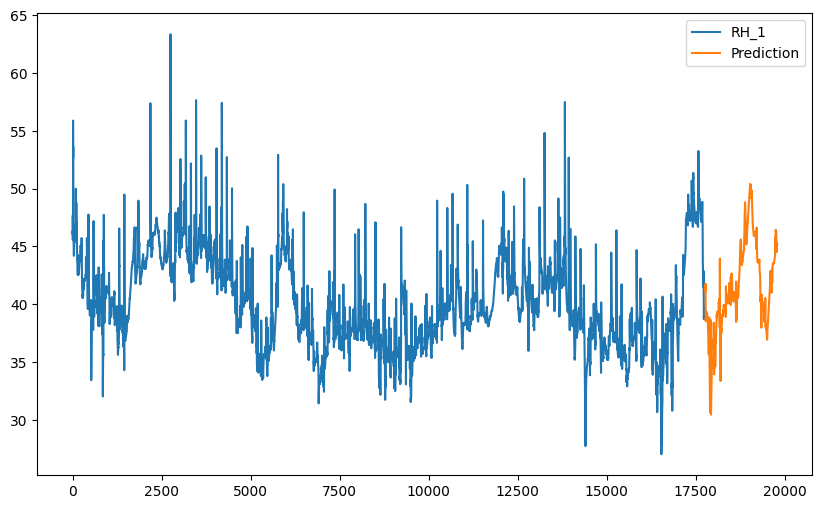

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data_train' is your pandas DataFrame
ax = data_train.plot()  # Call the plot method on the DataFrame
df_prediction.plot(ax=ax, figsize=(10, 6))
plt.show()  # Display the plot

#Visualize Prediction and Compare Actual

<Axes: >

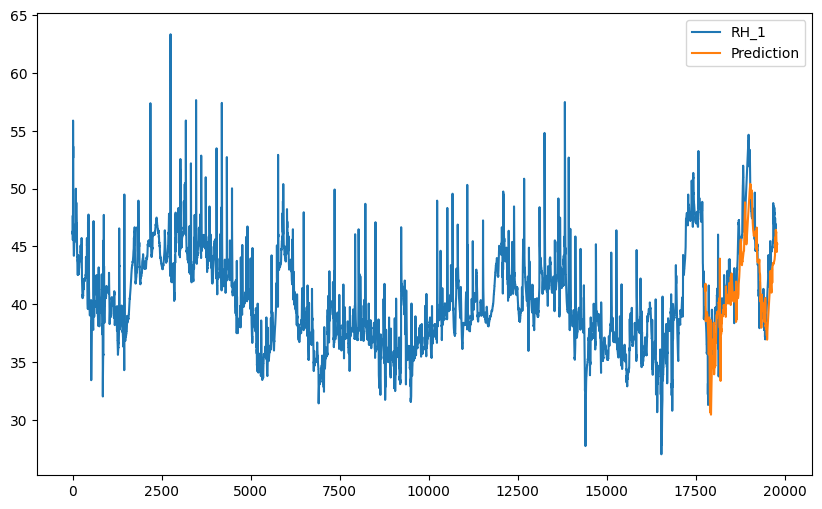

In [162]:
ax = df.plot()
df_prediction.plot(ax=ax, figsize=(10, 6))

#Time Series Forecasting with LSTM
Overview
Time series forecasting:

-) Forecast into the "future" or unknown range

-) Should employ all the available data

-) I.e., NOT split the data into training/testing

In [163]:
#Still use MinHoxscaler to normalize the full input dataset df
full_scaler = MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df)

Create TimeSeriesGenerastor for Forecasting

In [164]:
# Number of time steps of the input time series
#Still use Length50:
length50

50

In [165]:
#Create Timeseries Generator for forecasting
forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=50, batch_size=32)

Build, Compile, and Fit LSTM Model for Forecasting


In [166]:
# Train/Fit LSTH nodel
# In forecasting, we don't validate, only FORECAST
# So, not need Earlystop; Not need validation generator
# Use model.fit instead of model.fit_generator
# and call correct TimeseriesGenerator 'forecast_tsGenerator'
model.fit(forecast_tsGenerator, epochs=5)

Epoch 1/5
  2/616 ━━━━━━━━━━━━━━━━━━━━ 54s 89ms/step - loss: 7.9412e-04  

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


616/616 ━━━━━━━━━━━━━━━━━━━━ 66s 106ms/step - loss: 6.4807e-04
Epoch 2/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 63s 103ms/step - loss: 6.0866e-04
Epoch 3/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - loss: 5.5390e-04
Epoch 4/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 67s 109ms/step - loss: 4.1717e-04
Epoch 5/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 66s 106ms/step - loss: 6.8550e-04


Time Series Forecast Using LSTM Neural Network:

In [168]:
# Set number of features
# Feature: Attribute/Variable of the data set - used as predictors
# Only using one feature: Close price
n_features = 1

In [169]:
forecast = []
# a Set periods with the time span of forecasting
# = Let's forecast for the next 107 business days
periods = 107

first_eval_batch = normalized_full_data[-length50:]
current_batch = first_eval_batch.reshape((1, length50, n_features))


for i in range(periods):
    # get prediction 1 time stamp ahead ((0) is for grabbing just the number instead of [array))
    current_pred = model.predict(current_batch)[0]
    # store prediction
    forecast.append(current_pred)
    #update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━

Inverse to Transform Normalized Data Back into True Values

In [170]:
forecast = full_scaler.inverse_transform(forecast)
forecast

array([[45.96265163],
       [45.8448779 ],
       [45.68947714],
       [45.53588485],
       [45.39273621],
       [45.2579087 ],
       [45.12935345],
       [45.00554354],
       [44.88572094],
       [44.76931602],
       [44.65568553],
       [44.54495293],
       [44.43674786],
       [44.33080392],
       [44.22693268],
       [44.12487425],
       [44.02446184],
       [43.92539443],
       [43.82903863],
       [43.73557423],
       [43.64473698],
       [43.55587714],
       [43.46906184],
       [43.38395106],
       [43.30027622],
       [43.21806116],
       [43.13698966],
       [43.05697292],
       [42.978286  ],
       [42.90064518],
       [42.82362812],
       [42.74806433],
       [42.67397331],
       [42.60126626],
       [42.52666627],
       [42.45067148],
       [42.37384718],
       [42.29607208],
       [42.21775985],
       [42.13994576],
       [42.06264931],
       [41.9859203 ],
       [41.91003381],
       [41.83478623],
       [41.76014509],
       [41

creating a new timespam index with pandas

In [171]:

df

,RH_1
0,47.596667
1,46.693333
2,46.300000
3,46.066667
4,46.333333
...,...
19730,46.560000
19731,46.500000
19732,46.596667
19733,46.990000


In [172]:
#Calculate forecast index
forecast_index = np.arange(107, 19735, step=1)

In [174]:
#Calculate forecast index
# Since the forecast data has 107 values, the index should also have 107 values.
# Assuming the starting index should be 17761, we can adjust the end index:
# forecast_index was originally np.arange(17761, 19735 + len(forecast), step=1)
# which creates an index much longer than the forecast data
forecast_index = np.arange(17761, 17761 + len(forecast), step=1)
# This creates an index with the same length as forecast

forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=["Forecast"])

In [175]:
forecast_df

,Forecast
17761,45.962652
17762,45.844878
17763,45.689477
17764,45.535885
17765,45.392736
...,...
17863,39.315105
17864,39.305480
17865,39.296342
17866,39.287679


#PLot the Forecast

<Axes: >

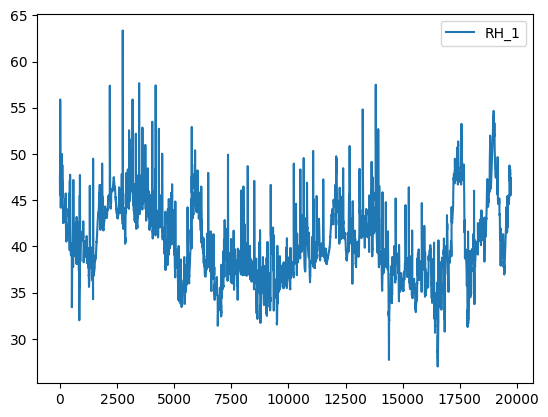

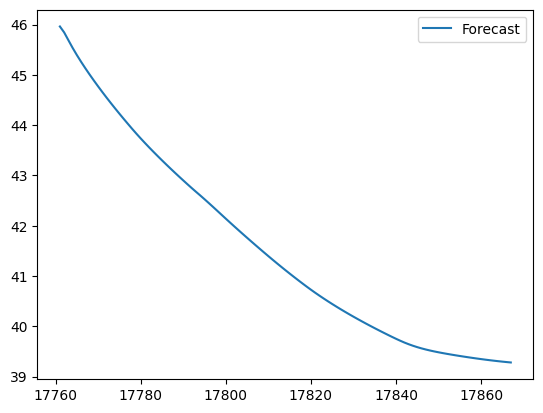

In [176]:
df.plot()
forecast_df. plot()

#Joining Pandas Plots

<Axes: >

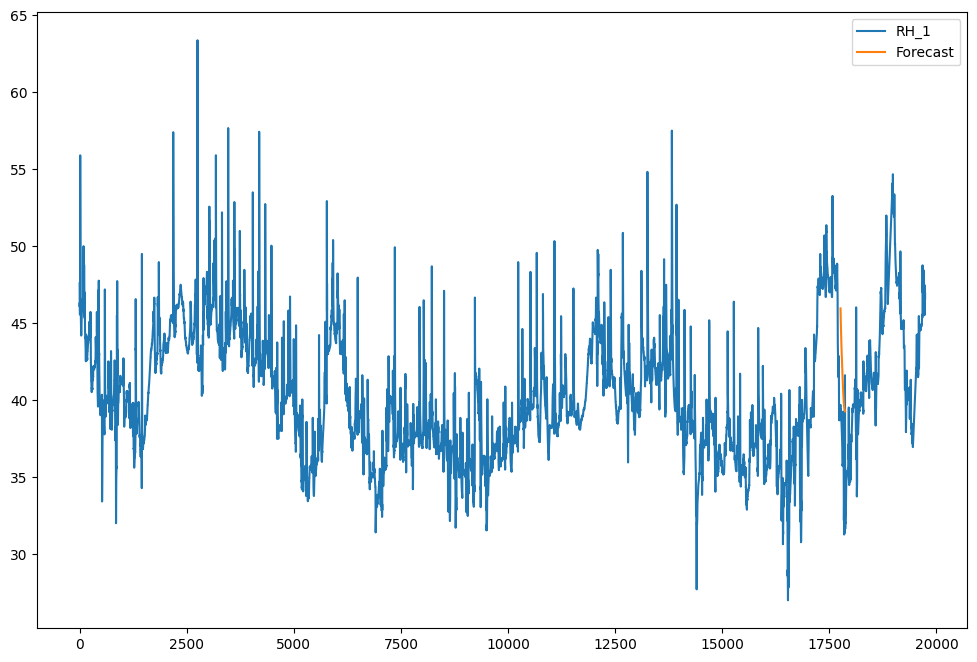

In [177]:
ax = df.plot()
forecast_df.plot(ax=ax, figsize=(12, 8))